In [173]:
import networkx as nx
import numpy as np
from src.em import em_algorithm
from graspologic.plot import adjplot
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
edges_data = "data/E-coli/Escherichia-coli_edge-list.txt"
labels_data = "data/E-coli/Escherichia-coli.txt"

# Nodes
with open(edges_data) as edgelist:
    nb_nodes = int(edgelist.readline().strip("Nb_nodes:"))
G = nx.Graph()
G.add_nodes_from(range(nb_nodes))

# Edges
with open(edges_data) as edgelist:
    partial_graph = nx.read_edgelist(edgelist)
for edge in partial_graph.edges():
    G.add_edge(int(edge[0]), int(edge[1]))

# Labels
with open(labels_data) as labels:
    labels = labels.readlines()[1:]
    labels = [label.strip() for label in labels]
    labels = np.array(labels)
assert len(labels) == len(G.nodes())
for i, label in enumerate(labels):
    G.nodes[i]["label"] = label

X = nx.adjacency_matrix(G).todense()

In [ ]:
Q = 21
alpha, pi, tau = em_algorithm(
    X, Q, n_init=1, iterations=10, implementation="pytorch_log"
)

In [4]:
with open("results/alpha.pkl", "wb") as f:
    pickle.dump(alpha, f)
with open("results/pi.pkl", "wb") as f:
    pickle.dump(pi, f)
with open("results/tau.pkl", "wb") as f:
    pickle.dump(tau, f)

In [3]:
with open("results/alpha.pkl", "rb") as f:
    alpha = pickle.load(f)
with open("results/pi.pkl", "rb") as f:
    pi = pickle.load(f)
with open("results/tau.pkl", "rb") as f:
    tau = pickle.load(f)

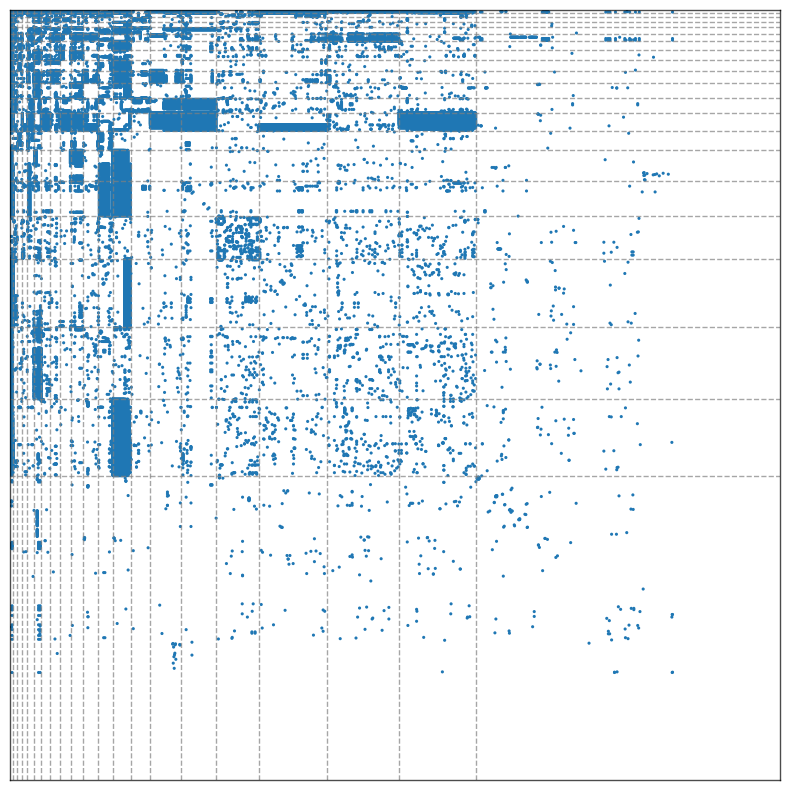

In [6]:
classification = tau.argmax(axis=1)

meta = pd.DataFrame(
    data={
        "Class": classification,
    },
)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(data=X, ax=ax, meta=meta, plot_type="scattermap", group=["Class"], ticks=False)
plt.savefig("images/escheria-coli.png")
plt.show()

# SBM dataset

In [172]:
from src.data import generate_SBM_dataset, graph_and_params_from_archive
from src.graphs import *
from src.experiments import launch_experiment, write_report, initialization_sensitivity

In [174]:
%reload_ext autoreload
%autoreload 2

In [168]:
generate_SBM_dataset(2, n_graphs=10)

Generating dataset...
0% complete...
10% complete...
20% complete...
30% complete...
40% complete...
50% complete...
60% complete...
70% complete...
80% complete...
90% complete...
Done.


[0.52725866 0.47274134] [[0.27058223 0.25804683]
 [0.62941777 0.64195317]]


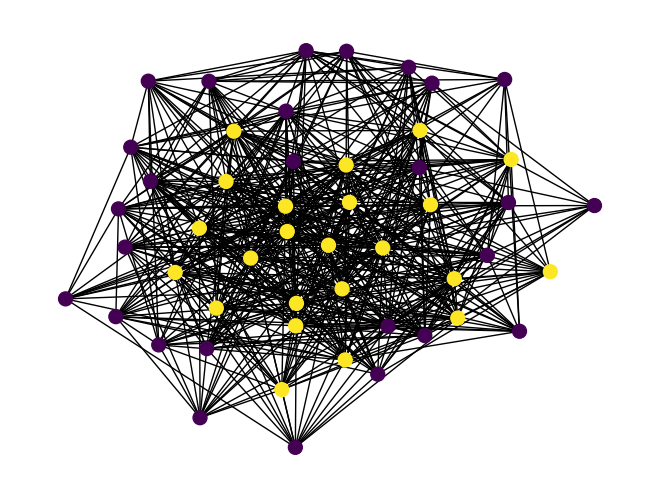

In [175]:
X, Z, alpha, pi = graph_and_params_from_archive("SBM/experiment_2/graph_1.npz")
print(alpha, pi)
draw_graph(X, Z, tight=True)

In [177]:
alpha_pred, pi_pred, tau_pred = em_algorithm(
    X,
    Q=2,
    n_init=2,
    iterations=100,
    implementation='pytorch',
    verbose=False,
)

[0.37280294 0.62719706] [[0.66976176 0.53694795]
 [0.53694795 0.29443627]]


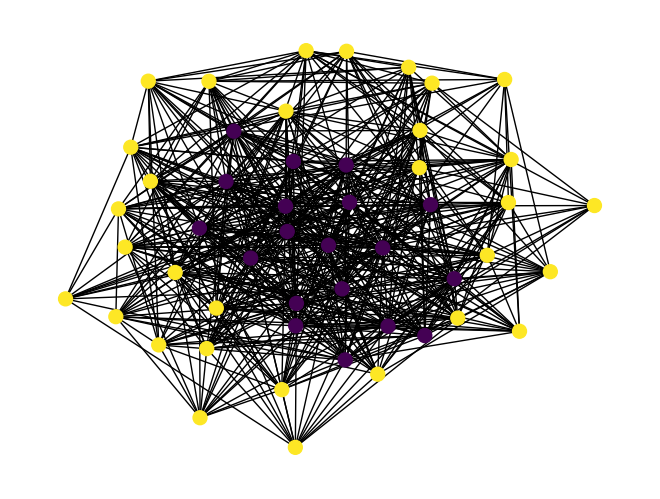

In [178]:
print(alpha_pred, pi_pred)
draw_graph(X, tau_pred, tight=True)

In [4]:
launch_experiment(2, n_init= 5, n_iter=100)

0% complete...
10% complete...
20% complete...
!! Skipped one graph due to decreasing log likelihood !!
30% complete...
!! Skipped one graph due to decreasing log likelihood !!
40% complete...
!! Skipped one graph due to decreasing log likelihood !!
50% complete...
60% complete...
70% complete...
!! Skipped one graph due to decreasing log likelihood !!
80% complete...
90% complete...
!! Skipped one graph due to decreasing log likelihood !!


In [5]:
write_report(2)

# === TEST ZONE ===

In [42]:
initialization_sensitivity(1, n_iter=100)

Initialization 1/1...
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3279, 0.3314, 0.3407], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.3404], device='cuda:0')
tensor([0.3278, 0.3318, 0.34

TypeError: unsupported operand type(s) for *: 'NoneType' and 'Tensor'